### What is Pandas

Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

https://pandas.pydata.org/about/index.html

### Pandas Series

A Pandas Series is like a column in a table. It is a 1-D array holding data of any type.

### Importing Pandas

In [1]:
import numpy as np
import pandas as pd

### Series from lists

In [ ]:
# string
country = ['India','Pakistan','USA','Nepal','Srilanka']

pd.Series(country)

,0
0,India
1,Pakistan
2,USA
3,Nepal
4,Srilanka


In [ ]:
# integers
runs = [13,24,56,78,100]

runs_ser = pd.Series(runs,dtype='int16')
runs_ser

,0
0,13
1,24
2,56
3,78
4,100


In [ ]:
# custom index
marks = [67,57,89,100]
subjects = ['maths','english','science','hindi']

pd.Series(marks,index=subjects)

,0
maths,67
english,57
science,89
hindi,100


In [ ]:
# setting a name
marks = pd.Series(marks,index=subjects,name='Nitish ke marks')
marks

,Nitish ke marks
maths,67
english,57
science,89
hindi,100


### Series from dict

In [ ]:
marks = {
    'maths':67,
    'english':57,
    'science':89,
    'hindi':100
}

marks_series = pd.Series(marks,name='nitish ke marks')
marks_series

,nitish ke marks
maths,67
english,57
science,89
hindi,100


### Series Attributes

In [ ]:
# size
marks_series.size

4

In [ ]:
# dtype
marks_series.dtype

dtype('int64')

In [ ]:
# name
marks_series.name

'nitish ke marks'

In [ ]:
# is_unique
marks_series.is_unique

pd.Series([1,1,2,3,4,5]).is_unique

False

In [ ]:
# index
marks_series.index

Index(['maths', 'english', 'science', 'hindi'], dtype='object')

In [ ]:
runs_ser.index

RangeIndex(start=0, stop=5, step=1)

In [ ]:

# values
marks_series.values

array([ 67,  57,  89, 100])

In [ ]:
runs_ser.values

array([ 13,  24,  56,  78, 100], dtype=int16)



### Series using read_csv

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!ls /content/drive/MyDrive/colab_datasets



bollywood.csv  kohli_ipl.csv  subs.csv


In [ ]:
# with one col
subs = pd.read_csv('/content/drive/MyDrive/colab_datasets/subs.csv')
subs

,Subscribers gained
0,48
1,57
2,40
3,43
4,44
...,...
360,231
361,226
362,155
363,144


In [ ]:
type(subs)

pandas.core.frame.DataFrame

In [ ]:
subs=pd.read_csv('subs.csv',squeeze=True)
subs

TypeError: read_csv() got an unexpected keyword argument 'squeeze'

In [ ]:
subs_df = pd.read_csv('/content/drive/MyDrive/colab_datasets/subs.csv')
subs = subs_df.iloc[:, 0] # Select the first column to get a Series
subs
# The error 'TypeError: read_csv() got an unexpected keyword argument 'squeeze'' means that the
# squeeze parameter is no longer available in the pd.read_csv function in the current version
#  of Pandas. To fix this, you should first read the CSV into a DataFrame, and then select
#  the column you want to turn into a Series. I've updated the cell to do this.

,Subscribers gained
0,48
1,57
2,40
3,43
4,44
...,...
360,231
361,226
362,155
363,144


In [ ]:
# with 2 cols
vk = pd.read_csv('/content/drive/MyDrive/colab_datasets/kohli_ipl.csv')
vk

,match_no,runs
0,1,1
1,2,23
2,3,13
3,4,12
4,5,1
...,...,...
210,211,0
211,212,20
212,213,73
213,214,25


In [ ]:
vk = pd.read_csv('/content/drive/MyDrive/colab_datasets/kohli_ipl.csv',index_col='match_no')
vk

,runs
match_no,
1,1
2,23
3,13
4,12
5,1
...,...
211,0
212,20
213,73


In [ ]:
movies = pd.read_csv('/content/drive/MyDrive/colab_datasets/bollywood.csv',index_col='movie')
movies

,lead
movie,
Uri: The Surgical Strike,Vicky Kaushal
Battalion 609,Vicky Ahuja
The Accidental Prime Minister (film),Anupam Kher
Why Cheat India,Emraan Hashmi
Evening Shadows,Mona Ambegaonkar
...,...
Hum Tumhare Hain Sanam,Shah Rukh Khan
Aankhen (2002 film),Amitabh Bachchan
Saathiya (film),Vivek Oberoi


### Series methods

In [ ]:
# head and tail
subs.head()

,Subscribers gained
0,48
1,57
2,40
3,43
4,44


In [ ]:
vk.head(3)

,runs
match_no,
1,1
2,23
3,13


In [ ]:
vk.tail(10)

,runs
match_no,
206,0
207,0
208,9
209,58
210,30
211,0
212,20
213,73
214,25


In [ ]:
# sample
movies.sample(5)

,lead
movie,
Go (2007 film),Gautam Gupta
31st October (film),Soha Ali Khan
Jaan-E-Mann,Salman Khan
Risk (2007 film),Vinod Khanna
Agent Vinod (2012 film),Kareena Kapoor


In [ ]:
# value_counts -> movies
movies.value_counts()

,count
lead,
Akshay Kumar,48
Amitabh Bachchan,45
Ajay Devgn,38
Salman Khan,31
Sanjay Dutt,26
...,...
Naveen Bawa,1
Naushaad Abbas,1
Nauheed Cyrusi,1


In [ ]:
# sort_values
vk.sort_values(by='runs',ascending=False)

,runs
match_no,
128,113
126,109
123,108
164,100
120,100
...,...
91,0
93,0
87,0


In [ ]:
vk.sort_values(by='runs', ascending=False).head(1)

,runs
match_no,
128,113


In [ ]:
vk.sort_values(by='runs', ascending=False).head(1).values

array([[113]])

In [ ]:
vk.sort_values(by='runs',inplace=True) # permenently saves the changes to the dataframe

In [ ]:
vk

,runs
match_no,
8,0
87,0
93,0
91,0
206,0
...,...
164,100
120,100
123,108


In [ ]:
# sort_index
movies.sort_index(ascending=False)

,lead
movie,
Zor Lagaa Ke...Haiya!,Meghan Jadhav
Zokkomon,Darsheel Safary
Zindagi Tere Naam,Mithun Chakraborty
Zindagi Na Milegi Dobara,Hrithik Roshan
Zindagi 50-50,Veena Malik
...,...
2 States (2014 film),Arjun Kapoor
1971 (2007 film),Manoj Bajpayee
1920: The Evil Returns,Vicky Ahuja


In [ ]:
# sort_index
movies.sort_index(ascending=False,inplace=True)

In [ ]:
movies

,lead
movie,
Zor Lagaa Ke...Haiya!,Meghan Jadhav
Zokkomon,Darsheel Safary
Zindagi Tere Naam,Mithun Chakraborty
Zindagi Na Milegi Dobara,Hrithik Roshan
Zindagi 50-50,Veena Malik
...,...
2 States (2014 film),Arjun Kapoor
1971 (2007 film),Manoj Bajpayee
1920: The Evil Returns,Vicky Ahuja


In [ ]:
vk.sort_values(inplace=True)

In [ ]:
vk

match_no
87       0
211      0
207      0
206      0
91       0
      ... 
164    100
120    100
123    108
126    109
128    113
Name: runs, Length: 215, dtype: int64

### Series Maths Methods

In [ ]:
# count
vk.count()

,0
runs,215


In [ ]:
# sum
print(subs.sum())

49510


In [ ]:
# mean -> median -> mode -> std -> var
print(subs.mean())
print(vk.median())
print(movies.mode())
print(subs.std())
print(vk.var())

135.64383561643837
runs    24.0
dtype: float64
           lead
0  Akshay Kumar
62.67502303725269
runs    688.002478
dtype: float64


In [ ]:
# min/max
subs.max()

396

In [ ]:
# describe
subs.describe()

count    365.000000
mean     135.643836
std       62.675023
min       33.000000
25%       88.000000
50%      123.000000
75%      177.000000
max      396.000000
Name: Subscribers gained, dtype: float64

### Series Indexing

In [ ]:
# integer indexing
x = pd.Series([12,13,14,35,46,57,58,79,9])
x

,0
0,12
1,13
2,14
3,35
4,46
5,57
6,58
7,79
8,9


In [ ]:
x[1]

np.int64(13)

In [ ]:
movies

,lead
movie,
1920 (film),Rajniesh Duggall
1920: London,Sharman Joshi
1920: The Evil Returns,Vicky Ahuja
1971 (2007 film),Manoj Bajpayee
2 States (2014 film),Arjun Kapoor
...,...
Zindagi 50-50,Veena Malik
Zindagi Na Milegi Dobara,Hrithik Roshan
Zindagi Tere Naam,Mithun Chakraborty


In [ ]:
movies[0]

KeyError: 0

In [ ]:
vk[-1]

KeyError: -1

In [ ]:
marks_series

,nitish ke marks
maths,67
english,57
science,89
hindi,100


In [ ]:
marks_series[-1]

/tmp/ipython-input-569294583.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  marks_series[-1]


np.int64(100)

### slicing

In [ ]:
# slicing
vk[5:16]

,runs
match_no,
207,0
135,0
130,0
211,0
106,1
204,1
113,1
77,1
1,1


In [ ]:
# negative slicing
vk[-5:]

,runs
match_no,
164,100
120,100
123,108
126,109
128,113


In [ ]:
movies[::2]

movie
Zor Lagaa Ke...Haiya!         Meghan Jadhav
Zindagi Tere Naam        Mithun Chakraborty
Zindagi 50-50                   Veena Malik
Zinda (film)                    Sanjay Dutt
Zid (2014 film)              Mannara Chopra
                                ...        
3 Storeys                       Aisha Ahmed
3 Deewarein                Naseeruddin Shah
22 Yards                        Barun Sobti
1971 (2007 film)             Manoj Bajpayee
1920: London                  Sharman Joshi
Name: lead, Length: 750, dtype: object

In [ ]:
# fancy indexing
vk[[1,3,4,5]]

match_no
1     1
3    13
4    12
5     1
Name: runs, dtype: int64

In [ ]:
# indexing with labels -> fancy indexing
movies['2 States (2014 film)']

'Arjun Kapoor'

### Editing Series

In [ ]:
# using indexing
marks_series[1] = 100
marks_series

/tmp/ipython-input-3621369324.py:2: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  marks_series[1] = 100


,nitish ke marks
maths,67
english,100
science,89
hindi,100


In [ ]:
# what if an index does not exist
marks_series['evs'] = 100

In [ ]:
marks_series

,nitish ke marks
maths,67
english,100
science,89
hindi,100
evs,100


In [ ]:
# slicing
runs_ser[2:4] = [100,100]
runs_ser

/tmp/ipython-input-2906310519.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[100, 100]' has dtype incompatible with int16, please explicitly cast to a compatible dtype first.
  runs_ser[2:4] = [100,100]


,0
0,13
1,24
2,100
3,100
4,100


In [ ]:
# fancy indexing
runs_ser[[0,3,4]] = [0,0,0]
runs_ser

,0
0,0
1,24
2,100
3,0
4,0


In [ ]:
# using index label
movies['2 States (2014 film)'] = 'Alia Bhatt'
movies

,lead,2 States (2014 film)
movie,,
1920 (film),Rajniesh Duggall,Alia Bhatt
1920: London,Sharman Joshi,Alia Bhatt
1920: The Evil Returns,Vicky Ahuja,Alia Bhatt
1971 (2007 film),Manoj Bajpayee,Alia Bhatt
2 States (2014 film),Arjun Kapoor,Alia Bhatt
...,...,...
Zindagi 50-50,Veena Malik,Alia Bhatt
Zindagi Na Milegi Dobara,Hrithik Roshan,Alia Bhatt
Zindagi Tere Naam,Mithun Chakraborty,Alia Bhatt


In [ ]:
movies.loc['2 States (2014 film)'] = 'Alia Bhatt'
print(movies.loc['2 States (2014 film)'])

lead    Alia Bhatt
Name: 2 States (2014 film), dtype: object


This code line `movies.loc['2 States (2014 film)'] = 'Alia Bhatt'` directly updates the value associated with the index label '2 States (2014 film)' in your `movies` Series to 'Alia Bhatt'. You can then print the value to verify the change.

### Copy and Views

### Series with Python Functionalities

In [ ]:
# len/type/dir/sorted/max/min
print(len(subs))
print(type(subs))
print(dir(subs)) # it will give all the attributes and methods used in that series
print(sorted(subs)) # it will output a sorted list
print(min(subs))
print(max(subs))

365
<class 'pandas.core.series.Series'>
['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__bool__', '__class__', '__column_consortium_standard__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pandas_priority__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce

In [ ]:
# type conversion
list(marks_series)

[67, 57, 89, 100]

In [ ]:
dict(marks_series)

{'maths': np.int64(67),
 'english': np.int64(57),
 'science': np.int64(89),
 'hindi': np.int64(100)}

In [ ]:
# membership operator
'2 States (2014 film)' in movies.index

True

In [ ]:
'Sharman Joshi' in movies.values

True

In [ ]:
movies

,lead
movie,
Uri: The Surgical Strike,Vicky Kaushal
Battalion 609,Vicky Ahuja
The Accidental Prime Minister (film),Anupam Kher
Why Cheat India,Emraan Hashmi
Evening Shadows,Mona Ambegaonkar
...,...
Hum Tumhare Hain Sanam,Shah Rukh Khan
Aankhen (2002 film),Amitabh Bachchan
Saathiya (film),Vivek Oberoi


In [ ]:
# looping
for i in movies.index:
  print(i)

Uri: The Surgical Strike
Battalion 609
The Accidental Prime Minister (film)
Why Cheat India
Evening Shadows
Soni (film)
Fraud Saiyaan
Bombairiya
Manikarnika: The Queen of Jhansi
Thackeray (film)
Amavas
Gully Boy
Hum Chaar
Total Dhamaal
Sonchiriya
Badla (2019 film)
Mard Ko Dard Nahi Hota
Hamid (film)
Photograph (film)
Risknamaa
Mere Pyare Prime Minister
22 Yards
Kesari (film)
Notebook (2019 film)
Junglee (2019 film)
Gone Kesh
Albert Pinto Ko Gussa Kyun Aata Hai?
The Tashkent Files
Kalank
Setters (film)
Student of the Year 2
PM Narendra Modi
De De Pyaar De
India's Most Wanted (film)
Yeh Hai India
Khamoshi (2019 film)
Kabir Singh
Article 15 (film)
One Day: Justice Delivered
Hume Tumse Pyaar Kitna
Super 30 (film)
Family of Thakurganj
Batla House
Jhootha Kahin Ka
Judgementall Hai Kya
Chicken Curry Law
Arjun Patiala
Jabariya Jodi
Pranaam
The Sky Is Pink
Mission Mangal
Saaho
Dream Girl (2019 film)
Section 375
The Zoya Factor (film)
Pal Pal Dil Ke Paas
Prassthanam
P Se Pyaar F Se Faraar
Ghost 

In [ ]:
# Arithmetic Operators(Broadcasting)
100 + marks_series

maths      167
english    200
science    189
hindi      200
sst        190
evs        200
Name: nitish ke marks, dtype: int64

In [ ]:
# Relational Operators

vk >= 50

match_no
1      False
2      False
3      False
4      False
5      False
       ...  
211    False
212    False
213     True
214    False
215    False
Name: runs, Length: 215, dtype: bool

### Boolean Indexing on Series

In [ ]:
# Find no of 50's and 100's scored by kohli
vk[vk >= 50].size

50

In [ ]:
# find number of ducks
vk[vk == 0].size

9

In [ ]:
# Count number of day when I had more than 200 subs a day
subs[subs > 200].size

59

In [ ]:
movies.value_counts()

,count
lead,
Akshay Kumar,48
Amitabh Bachchan,45
Ajay Devgn,38
Salman Khan,31
Sanjay Dutt,26
...,...
Naveen Bawa,1
Naushaad Abbas,1
Nauheed Cyrusi,1


In [ ]:
# find actors who have done more than 20 movies
num_movies = movies.value_counts()
num_movies[num_movies > 20]

Akshay Kumar        48
Amitabh Bachchan    45
Ajay Devgn          38
Salman Khan         31
Sanjay Dutt         26
Shah Rukh Khan      22
Emraan Hashmi       21
Name: lead, dtype: int64

### Plotting Graphs on Series

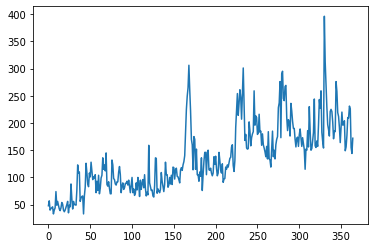

In [ ]:
subs.plot()

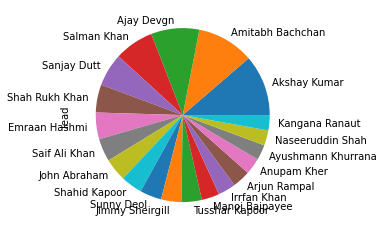

In [ ]:
movies.value_counts().head(20).plot(kind='pie')

<Axes: xlabel='lead'>

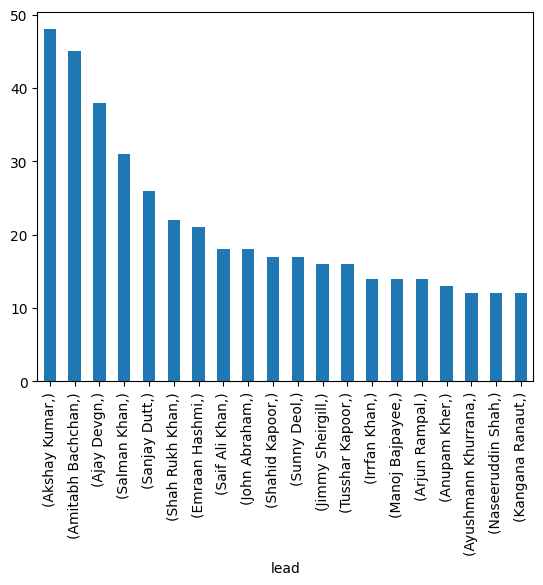

In [ ]:
movies.value_counts().head(20).plot(kind='bar')

### Some Important Series Methods

In [ ]:
# astype
# between
# clip
# drop_duplicates
# isnull
# dropna
# fillna
# isin
# apply
# copy

In [ ]:
import numpy as np
import pandas as pd

In [4]:
subs = pd.read_csv('/content/drive/MyDrive/colab_datasets/subs.csv')
subs=subs.iloc[:,0]
subs

,Subscribers gained
0,48
1,57
2,40
3,43
4,44
...,...
360,231
361,226
362,155
363,144


In [28]:
vk = pd.read_csv('/content/drive/MyDrive/colab_datasets/kohli_ipl.csv',index_col='match_no')
vk=vk.iloc[:,0]
vk

,runs
match_no,
1,1
2,23
3,13
4,12
5,1
...,...
211,0
212,20
213,73


In [6]:
movies = pd.read_csv('/content/drive/MyDrive/colab_datasets/bollywood.csv',index_col='movie')
movies=movies.iloc[:,0]
movies

,lead
movie,
Uri: The Surgical Strike,Vicky Kaushal
Battalion 609,Vicky Ahuja
The Accidental Prime Minister (film),Anupam Kher
Why Cheat India,Emraan Hashmi
Evening Shadows,Mona Ambegaonkar
...,...
Hum Tumhare Hain Sanam,Shah Rukh Khan
Aankhen (2002 film),Amitabh Bachchan
Saathiya (film),Vivek Oberoi


In [ ]:
# astype
import sys
sys.getsizeof(vk)

3472

In [ ]:
sys.getsizeof(vk.astype('int16'))

2182

In [ ]:
# between
vk[vk.between(51,99)].size

43

In [ ]:
# clip
subs

,Subscribers gained
0,48
1,57
2,40
3,43
4,44
...,...
360,231
361,226
362,155
363,144


In [ ]:
subs.clip(100,200) # clip makes all the no's less than 100 to 100, and all the no's greater than 200 to 200, and make it in the range of 100 to 200.

,Subscribers gained
0,100
1,100
2,100
3,100
4,100
...,...
360,200
361,200
362,155
363,144


In [ ]:
# drop_duplicates
temp = pd.Series([1,1,2,2,3,3,4,4])
temp

,0
0,1
1,1
2,2
3,2
4,3
5,3
6,4
7,4


In [ ]:
temp.drop_duplicates()

,0
0,1
2,2
4,3
6,4


In [ ]:
temp.drop_duplicates(keep='last')

,0
1,1
3,2
5,3
7,4


In [ ]:
temp.duplicated()

,0
0,False
1,True
2,False
3,True
4,False
5,True
6,False
7,True


In [ ]:
# here False means the value is not dupliacte and true means the value is duplicate.

In [ ]:
print(temp.duplicated().sum())

4


In [ ]:
print(vk.duplicated().sum()) # as the runs scored by vk are repeated.

137


In [ ]:
movies.drop_duplicates()

,lead
movie,
Uri: The Surgical Strike,Vicky Kaushal
Battalion 609,Vicky Ahuja
The Accidental Prime Minister (film),Anupam Kher
Why Cheat India,Emraan Hashmi
Evening Shadows,Mona Ambegaonkar
...,...
Sssshhh...,Tanishaa Mukerji
Rules: Pyaar Ka Superhit Formula,Tanuja
Right Here Right Now (film),Ankit


In [ ]:
temp = pd.Series([1,2,3,np.nan,5,6,np.nan,8,np.nan,10])
temp

,0
0,1.0
1,2.0
2,3.0
3,NaN
4,5.0
5,6.0
6,NaN
7,8.0
8,NaN
9,10.0


In [ ]:
temp.size

10

In [ ]:
print(temp.count())

7


In [ ]:
# isnull
temp.isnull()

,0
0,False
1,False
2,False
3,True
4,False
5,False
6,True
7,False
8,True
9,False


In [ ]:
print(temp.isnull().sum())

3


In [ ]:
# dropna
temp.dropna()

,0
0,1.0
1,2.0
2,3.0
4,5.0
5,6.0
7,8.0
9,10.0


In [ ]:
# fillna
temp.fillna(temp.mean())

0     1.0
1     2.0
2     3.0
3     5.0
4     5.0
5     6.0
6     5.0
7     8.0
8     5.0
9    10.0
dtype: float64

In [ ]:
# fillna
temp.fillna(0)

,0
0,1.0
1,2.0
2,3.0
3,0.0
4,5.0
5,6.0
6,0.0
7,8.0
8,0.0
9,10.0


In [ ]:
# isin
vk[(vk == 49) | (vk == 99)]

,runs
match_no,
82,99
86,49


In [ ]:
vk[vk.isin([49,99,100])]

,runs
match_no,
82,99
86,49
120,100
164,100


In [ ]:
# apply
movies

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
                                              ...       
Hum Tumhare Hain Sanam                    Shah Rukh Khan
Aankhen (2002 film)                     Amitabh Bachchan
Saathiya (film)                             Vivek Oberoi
Company (film)                                Ajay Devgn
Awara Paagal Deewana                        Akshay Kumar
Name: lead, Length: 1500, dtype: object

In [7]:
movies.apply(lambda x:x.split()[0].upper())

,lead
movie,
Uri: The Surgical Strike,VICKY
Battalion 609,VICKY
The Accidental Prime Minister (film),ANUPAM
Why Cheat India,EMRAAN
Evening Shadows,MONA
...,...
Hum Tumhare Hain Sanam,SHAH
Aankhen (2002 film),AMITABH
Saathiya (film),VIVEK


In [ ]:
subs

0       48
1       57
2       40
3       43
4       44
      ... 
360    231
361    226
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64

In [ ]:
subs.mean()

135.64383561643837

In [8]:
subs.apply(lambda x:'good day' if x > subs.mean() else 'bad day')

,Subscribers gained
0,bad day
1,bad day
2,bad day
3,bad day
4,bad day
...,...
360,good day
361,good day
362,good day
363,good day


In [ ]:
# copy

In [29]:
vk

,runs
match_no,
1,1
2,23
3,13
4,12
5,1
...,...
211,0
212,20
213,73


In [30]:
new = vk.head()

In [31]:
new

,runs
match_no,
1,1
2,23
3,13
4,12
5,1


In [32]:
new[1]

np.int64(1)

In [25]:
new[1] = 100

In [26]:
vk

,runs
match_no,
1,100
2,23
3,13
4,12
5,1
...,...
211,0
212,20
213,73


In [ ]:
# So upon changing on the head() file the change got reflected on the original file also.This happened because the head and tail
# method views the dataset, the does't copy the data. So any change on head reflects on the original data as well.
# Hence to make any temporary change or any chnge that we don't want to be reflected on our main data we can create a copy of the data.

In [33]:
new = vk.head().copy()

In [34]:
new[1] = 100

In [35]:
new

,runs
match_no,
1,100
2,23
3,13
4,12
5,1


In [36]:
vk

,runs
match_no,
1,1
2,23
3,13
4,12
5,1
...,...
211,0
212,20
213,73
